In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
#reading the dataset
retail_df = pd.read_excel('Online_Retail.xlsx')

In [3]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
# dropping the unwanted column
retail_df = retail_df.drop(['Description'], axis = 1)
retail_df = retail_df.drop(['InvoiceDate'], axis = 1)

In [7]:
retail_df.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country
0,536365,85123A,6,2.55,17850.0,United Kingdom
1,536365,71053,6,3.39,17850.0,United Kingdom
2,536365,84406B,8,2.75,17850.0,United Kingdom
3,536365,84029G,6,3.39,17850.0,United Kingdom
4,536365,84029E,6,3.39,17850.0,United Kingdom


In [8]:
#Label Encoding for the object column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
retail_df.Country = le.fit_transform(retail_df.Country)

In [9]:
retail_df.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country
0,536365,85123A,6,2.55,17850.0,36
1,536365,71053,6,3.39,17850.0,36
2,536365,84406B,8,2.75,17850.0,36
3,536365,84029G,6,3.39,17850.0,36
4,536365,84029E,6,3.39,17850.0,36


In [10]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   InvoiceNo   541909 non-null  object 
 1   StockCode   541909 non-null  object 
 2   Quantity    541909 non-null  int64  
 3   UnitPrice   541909 non-null  float64
 4   CustomerID  406829 non-null  float64
 5   Country     541909 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 24.8+ MB


In [11]:
#Converting Object datatype to numeric
retail_df['InvoiceNo'] = pd.to_numeric(retail_df['InvoiceNo'],errors='coerce')
retail_df['StockCode'] = pd.to_numeric(retail_df['StockCode'],errors='coerce')

In [12]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   InvoiceNo   532618 non-null  float64
 1   StockCode   487036 non-null  float64
 2   Quantity    541909 non-null  int64  
 3   UnitPrice   541909 non-null  float64
 4   CustomerID  406829 non-null  float64
 5   Country     541909 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 24.8 MB


In [13]:
#shape of the dataset
retail_df.shape

(541909, 6)

In [14]:
#dropping null rows
retail_df = retail_df.dropna(axis=0, how='any', inplace=False)

In [15]:
retail_df.shape

(363119, 6)

In [16]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363119 entries, 1 to 541908
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   InvoiceNo   363119 non-null  float64
 1   StockCode   363119 non-null  float64
 2   Quantity    363119 non-null  int64  
 3   UnitPrice   363119 non-null  float64
 4   CustomerID  363119 non-null  float64
 5   Country     363119 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 19.4 MB


In [17]:
#getting total amount for the dataset
retail_df['Amount'] = retail_df['Quantity']*retail_df['UnitPrice']

In [18]:
retail_df.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Amount
1,536365.0,71053.0,6,3.39,17850.0,36,20.34
5,536365.0,22752.0,2,7.65,17850.0,36,15.30
6,536365.0,21730.0,6,4.25,17850.0,36,25.50
7,536366.0,22633.0,6,1.85,17850.0,36,11.10
8,536366.0,22632.0,6,1.85,17850.0,36,11.10


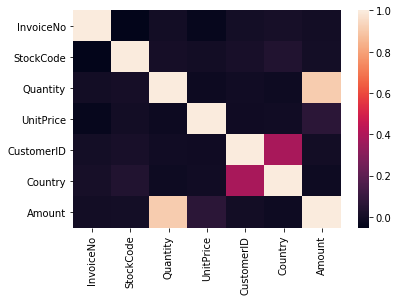

In [19]:
#correlation between the columns
sns.heatmap(retail_df.corr())

In [20]:
#importing KMeans library and fitting the model
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(retail_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
kmeans.labels_

array([2, 1, 1, ..., 0, 0, 0], dtype=int32)

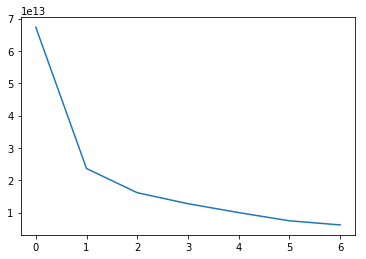

In [22]:
# Elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(retail_df)
    ssd.append(kmeans.inertia_)
# plot the SSDs for each n_clusters
plt.plot(ssd)